<a href="https://colab.research.google.com/github/Farhan-BA/Python-/blob/main/California_housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

# Load dataset
housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['MedHouseVal'] = housing.target

# Display basic statistics
print(df.head())
print(df.info())
print(df.describe())


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population

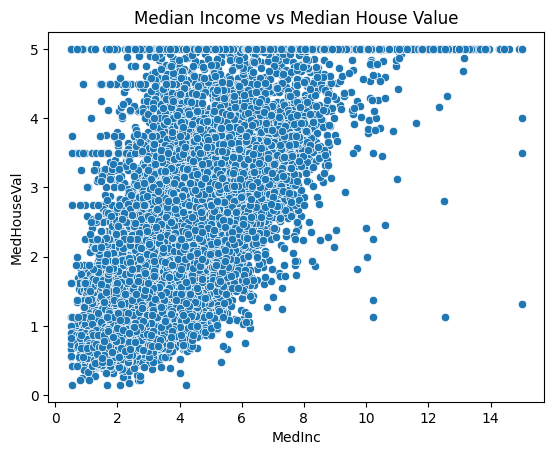

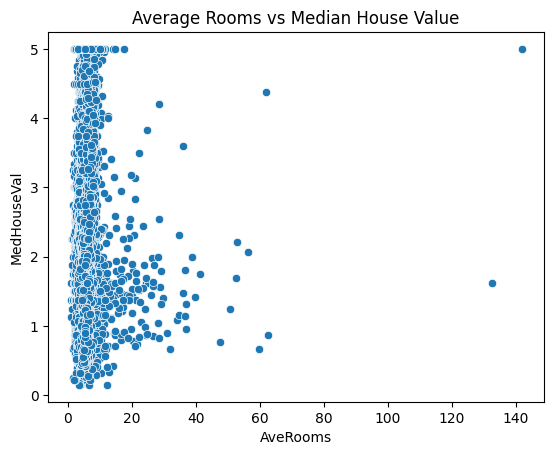

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(data=df, x='MedInc', y='MedHouseVal')
plt.title("Median Income vs Median House Value")
plt.show()

sns.scatterplot(data=df, x='AveRooms', y='MedHouseVal')
plt.title("Average Rooms vs Median House Value")
plt.show()


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Features and target
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Metrics
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("R² Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


Coefficients: [ 4.48674910e-01  9.72425752e-03 -1.23323343e-01  7.83144907e-01
 -2.02962058e-06 -3.52631849e-03 -4.19792487e-01 -4.33708065e-01]
Intercept: -37.02327770606409
R² Score: 0.5757877060324508
MAE: 0.5332001304956553
MSE: 0.5558915986952444
RMSE: 0.7455813830127764


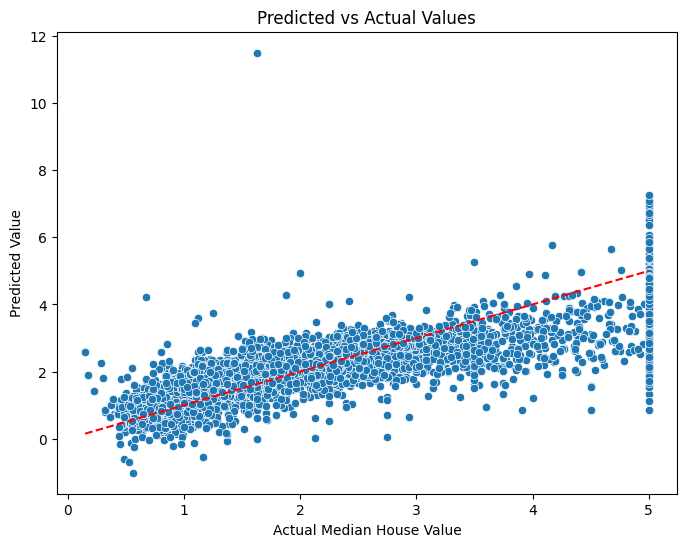

In [7]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Value")
plt.title("Predicted vs Actual Values")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # reference line
plt.show()


In [8]:
from sklearn.preprocessing import StandardScaler

# Select top correlated features
corr = df.corr()
top_features = corr['MedHouseVal'].abs().sort_values(ascending=False).index[1:5]  # top 4 features
print("Top correlated features:", top_features.tolist())

# Feature subset
X_top = df[top_features]

# Normalize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_top)

# Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Retrain
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# New Metrics
print("\nImproved Model Performance:")
print("R² Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


Top correlated features: ['MedInc', 'AveRooms', 'Latitude', 'HouseAge']

Improved Model Performance:
R² Score: 0.5043169272470043
MAE: 0.5993913548627591
MSE: 0.6495475488975627
RMSE: 0.8059451277212133
